<a href="https://colab.research.google.com/github/dkuzzmin/DI-Bootcamp/blob/main/Week9/Day1/W9D1_XC_XP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: In-Depth Analysis Of Sales By Category And Sub-Category

## 1. Traditional DA

In [112]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
#https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
df = pd.read_csv('train 2.csv')

In [114]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [115]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

In [116]:
df = df[(df['Order Date'] > pd.to_datetime('2017-12-31')) & (df['Order Date'] < pd.to_datetime('2021-01-01'))]

In [117]:
dfsales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum()
dfsales = pd.DataFrame(dfsales)
dfsales

Sales
Category        Sub-Category             
Furniture       Bookcases      30024.2797
                Chairs         93191.2730
                Furnishings    28204.6920
                Tables         60893.5425
Office Supplies Appliances     40212.7220
                Art             8825.6320
                Binders        71721.2550
                Envelopes       3378.5740
                Fasteners        855.0740
                Labels          3844.6960
                Paper          27504.7760
                Storage        68072.7020
                Supplies       15952.1100
Technology      Accessories    58240.9700
                Copiers        62899.3880
                Machines       43544.6750
                Phones        104685.6580

In [118]:
dfsales.sort_values(by=['Category', 'Sales'], ascending=[True, False])

Sales
Category        Sub-Category             
Furniture       Chairs         93191.2730
                Tables         60893.5425
                Bookcases      30024.2797
                Furnishings    28204.6920
Office Supplies Binders        71721.2550
                Storage        68072.7020
                Appliances     40212.7220
                Paper          27504.7760
                Supplies       15952.1100
                Art             8825.6320
                Labels          3844.6960
                Envelopes       3378.5740
                Fasteners        855.0740
Technology      Phones        104685.6580
                Copiers        62899.3880
                Accessories    58240.9700
                Machines       43544.6750

In [120]:
df1 = dfsales.xs('Furniture', level='Category').sort_values(by='Sales', ascending=False)[:2]
df2 = dfsales.xs('Office Supplies', level='Category').sort_values(by='Sales', ascending=False)[:2]
df3 = dfsales.xs('Technology', level='Category').sort_values(by='Sales', ascending=False)[:2]


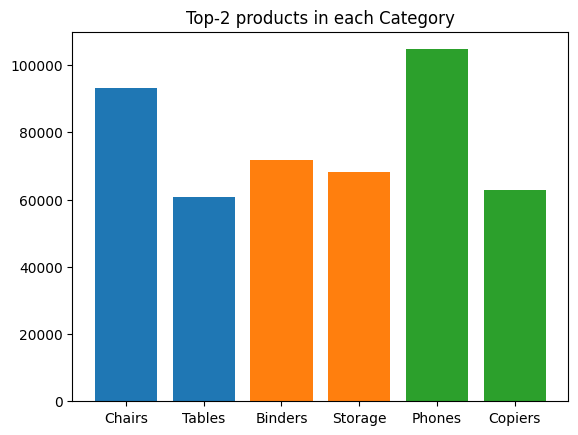

In [121]:
plt.bar(df1.index, df1['Sales'], label='Furniture')
plt.bar(df2.index, df2['Sales'], label='Office Supplies')
plt.bar(df3.index, df3['Sales'], label='Technology')
plt.title('Top-2 products in each Category')
plt.show()

## 2. Generative AI DA

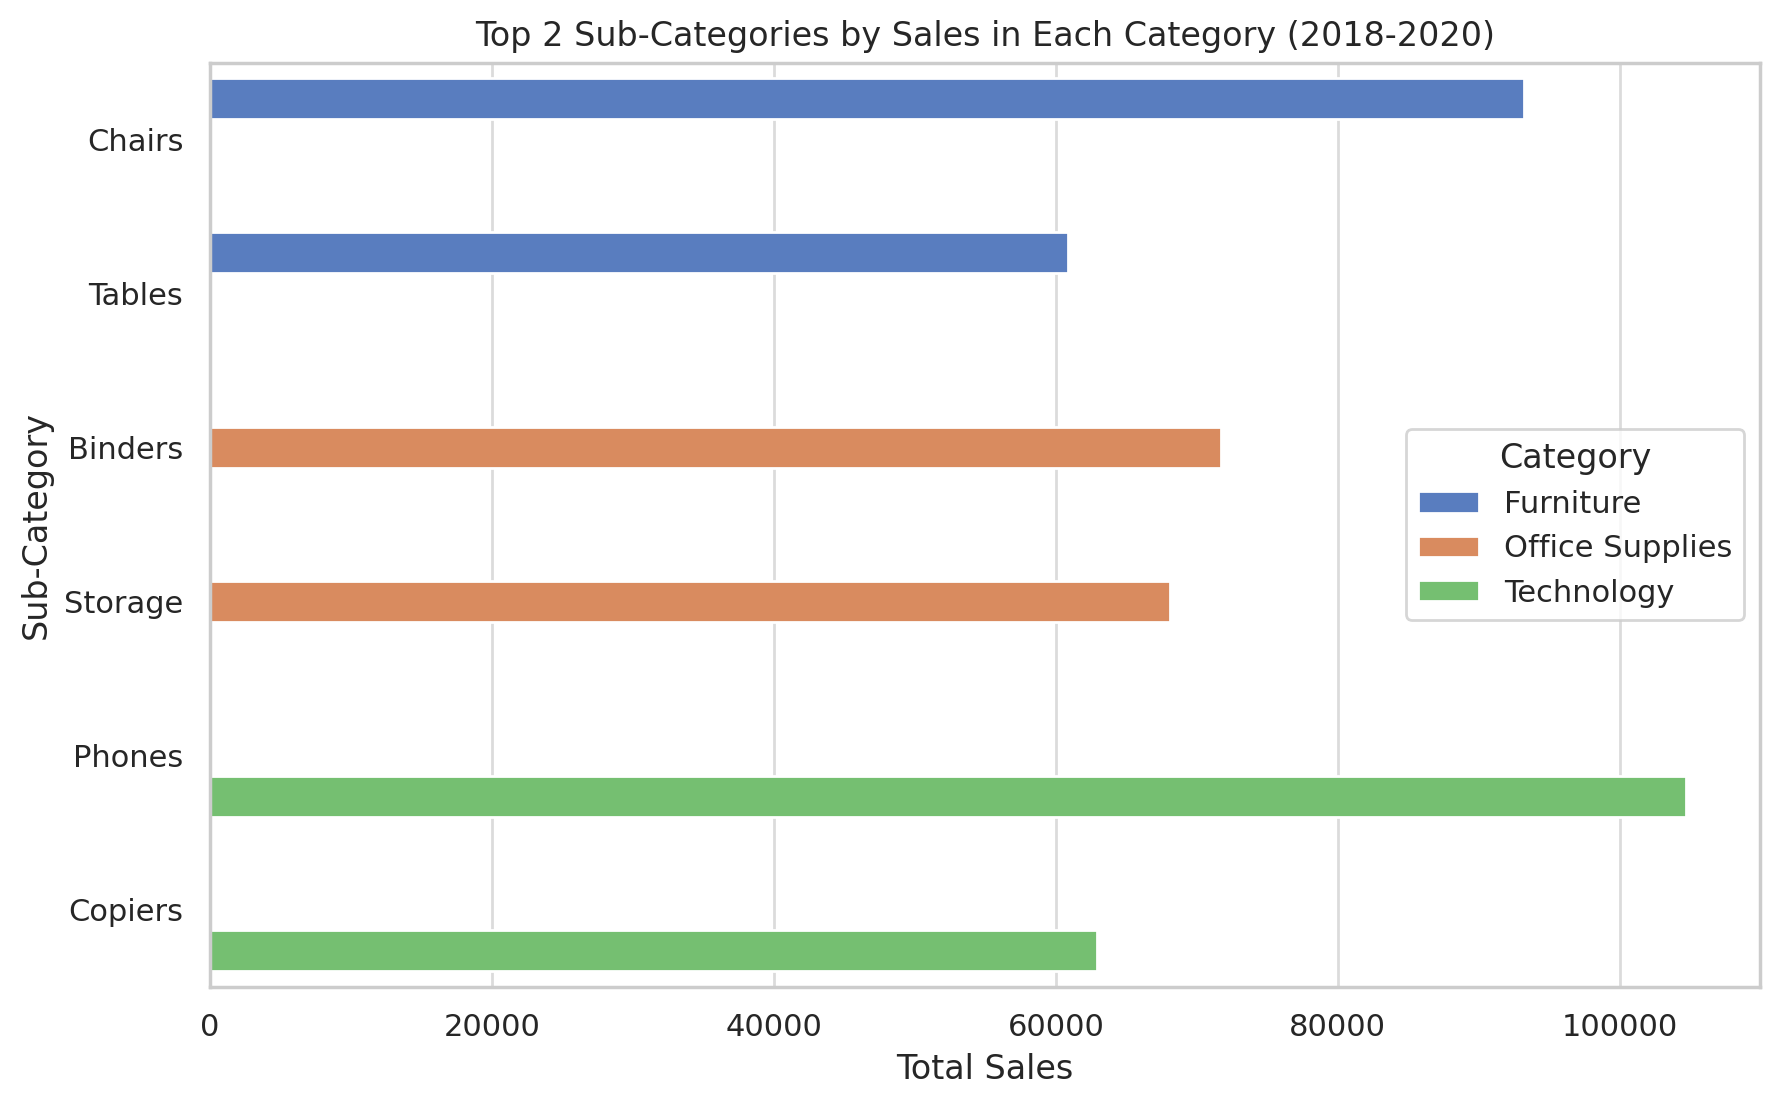

AI-output is more elegant, but both my and Al bars are relevent

# Exercise 2: Customer Lifetime Value (CLV) Analysis

## 1. Traditional DA

Create a new dataframe summarizing purchase frequency, average purchase value, and total sales per customer.
Calculate CLV for each customer.
Identify top customers by CLV and visualize their contribution.

In [130]:
newdf = df.groupby('Customer ID').agg({
    'Customer Name': 'first',
    'Sales': ['sum', 'mean'],
    'Order ID': 'count',
    'Order Date': ['min', 'max'],

})
newdf.columns =["Customer Name", "Total Sales", "Average Purchase", "Frequency", "FirstDate", "LastDate"]
newdf = pd.DataFrame(newdf)
newdf

,Customer Name,Total Sales,Average Purchase,Frequency,FirstDate,LastDate
Customer ID,,,,,,
AA-10315,Alex Avila,374.480,187.240000,2,2018-06-29,2018-06-29
AA-10375,Allen Armold,206.732,41.346400,5,2018-09-07,2018-12-11
AA-10480,Andrew Allen,15.552,15.552000,1,2018-04-15,2018-04-15
AA-10645,Anna Andreadi,12.960,12.960000,1,2018-11-05,2018-11-05
AB-10060,Adam Bellavance,2936.264,367.033000,8,2018-05-07,2018-11-06
...,...,...,...,...,...,...
XP-21865,Xylona Preis,449.312,74.885333,6,2018-10-06,2018-11-17
YC-21895,Yoseph Carroll,750.680,750.680000,1,2018-12-26,2018-12-26
YS-21880,Yana Sorensen,5340.264,762.894857,7,2018-04-13,2018-12-21


In [131]:
newdf['Period'] = pd.to_timedelta(newdf['LastDate'] - newdf['FirstDate']).dt.days
newdf

,Customer Name,Total Sales,Average Purchase,Frequency,FirstDate,LastDate,Period
Customer ID,,,,,,,
AA-10315,Alex Avila,374.480,187.240000,2,2018-06-29,2018-06-29,0
AA-10375,Allen Armold,206.732,41.346400,5,2018-09-07,2018-12-11,95
AA-10480,Andrew Allen,15.552,15.552000,1,2018-04-15,2018-04-15,0
AA-10645,Anna Andreadi,12.960,12.960000,1,2018-11-05,2018-11-05,0
AB-10060,Adam Bellavance,2936.264,367.033000,8,2018-05-07,2018-11-06,183
...,...,...,...,...,...,...,...
XP-21865,Xylona Preis,449.312,74.885333,6,2018-10-06,2018-11-17,42
YC-21895,Yoseph Carroll,750.680,750.680000,1,2018-12-26,2018-12-26,0
YS-21880,Yana Sorensen,5340.264,762.894857,7,2018-04-13,2018-12-21,252


In [132]:
newdf['Frequency'] = newdf['Frequency'] / 365

In [133]:
newdf

,Customer Name,Total Sales,Average Purchase,Frequency,FirstDate,LastDate,Period
Customer ID,,,,,,,
AA-10315,Alex Avila,374.480,187.240000,0.005479,2018-06-29,2018-06-29,0
AA-10375,Allen Armold,206.732,41.346400,0.013699,2018-09-07,2018-12-11,95
AA-10480,Andrew Allen,15.552,15.552000,0.002740,2018-04-15,2018-04-15,0
AA-10645,Anna Andreadi,12.960,12.960000,0.002740,2018-11-05,2018-11-05,0
AB-10060,Adam Bellavance,2936.264,367.033000,0.021918,2018-05-07,2018-11-06,183
...,...,...,...,...,...,...,...
XP-21865,Xylona Preis,449.312,74.885333,0.016438,2018-10-06,2018-11-17,42
YC-21895,Yoseph Carroll,750.680,750.680000,0.002740,2018-12-26,2018-12-26,0
YS-21880,Yana Sorensen,5340.264,762.894857,0.019178,2018-04-13,2018-12-21,252


In [134]:
newdf['CLV'] = newdf['Average Purchase'] * newdf['Frequency'] * newdf['Period']


In [135]:
newdf

,Customer Name,Total Sales,Average Purchase,Frequency,FirstDate,LastDate,Period,CLV
Customer ID,,,,,,,,
AA-10315,Alex Avila,374.480,187.240000,0.005479,2018-06-29,2018-06-29,0,0.000000
AA-10375,Allen Armold,206.732,41.346400,0.013699,2018-09-07,2018-12-11,95,53.806959
AA-10480,Andrew Allen,15.552,15.552000,0.002740,2018-04-15,2018-04-15,0,0.000000
AA-10645,Anna Andreadi,12.960,12.960000,0.002740,2018-11-05,2018-11-05,0,0.000000
AB-10060,Adam Bellavance,2936.264,367.033000,0.021918,2018-05-07,2018-11-06,183,1472.154279
...,...,...,...,...,...,...,...,...
XP-21865,Xylona Preis,449.312,74.885333,0.016438,2018-10-06,2018-11-17,42,51.701655
YC-21895,Yoseph Carroll,750.680,750.680000,0.002740,2018-12-26,2018-12-26,0,0.000000
YS-21880,Yana Sorensen,5340.264,762.894857,0.019178,2018-04-13,2018-12-21,252,3686.976789


In [137]:
newdf.sort_values(by='CLV', ascending=False)

,Customer Name,Total Sales,Average Purchase,Frequency,FirstDate,LastDate,Period,CLV
Customer ID,,,,,,,,
TA-21385,Tom Ashbrook,13723.498,2744.699600,0.013699,2018-04-04,2018-10-22,201,7557.323556
RB-19360,Raymond Buch,14203.278,2367.213000,0.016438,2018-03-23,2018-09-25,186,7237.834816
AR-10540,Andy Reiter,5820.580,1455.145000,0.010959,2018-01-16,2018-12-24,342,5453.803726
PK-19075,Pete Kriz,5979.136,854.162286,0.019178,2018-03-05,2018-12-21,291,4766.927605
AD-10180,Alan Dominguez,5433.890,679.236250,0.021918,2018-01-22,2018-12-01,313,4659.746767
...,...,...,...,...,...,...,...,...
KB-16315,Karl Braun,510.824,255.412000,0.005479,2018-03-09,2018-03-09,0,0.000000
JS-15685,Jim Sink,552.856,110.571200,0.013699,2018-11-18,2018-11-18,0,0.000000
JS-15595,Jill Stevenson,257.508,85.836000,0.008219,2018-09-02,2018-09-02,0,0.000000


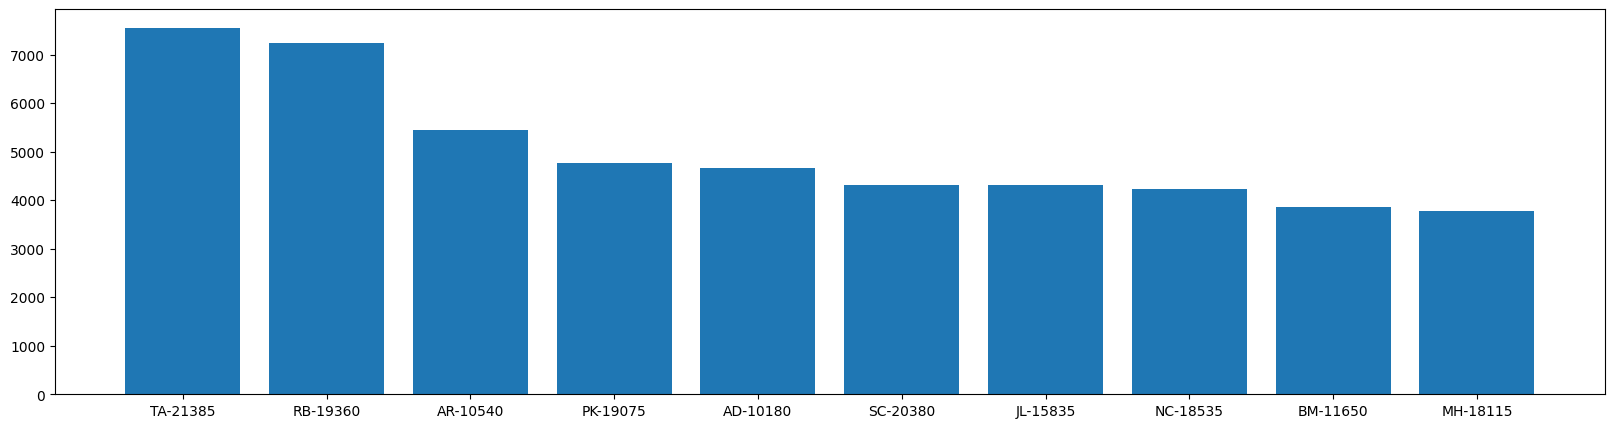

In [149]:
top = newdf.sort_values(by='CLV', ascending=False).head(10)
plt.figure(figsize=(20,5))

plt.bar(top['Customer Name'], top['CLV'])
plt.show()

## 2. Generative AI DA

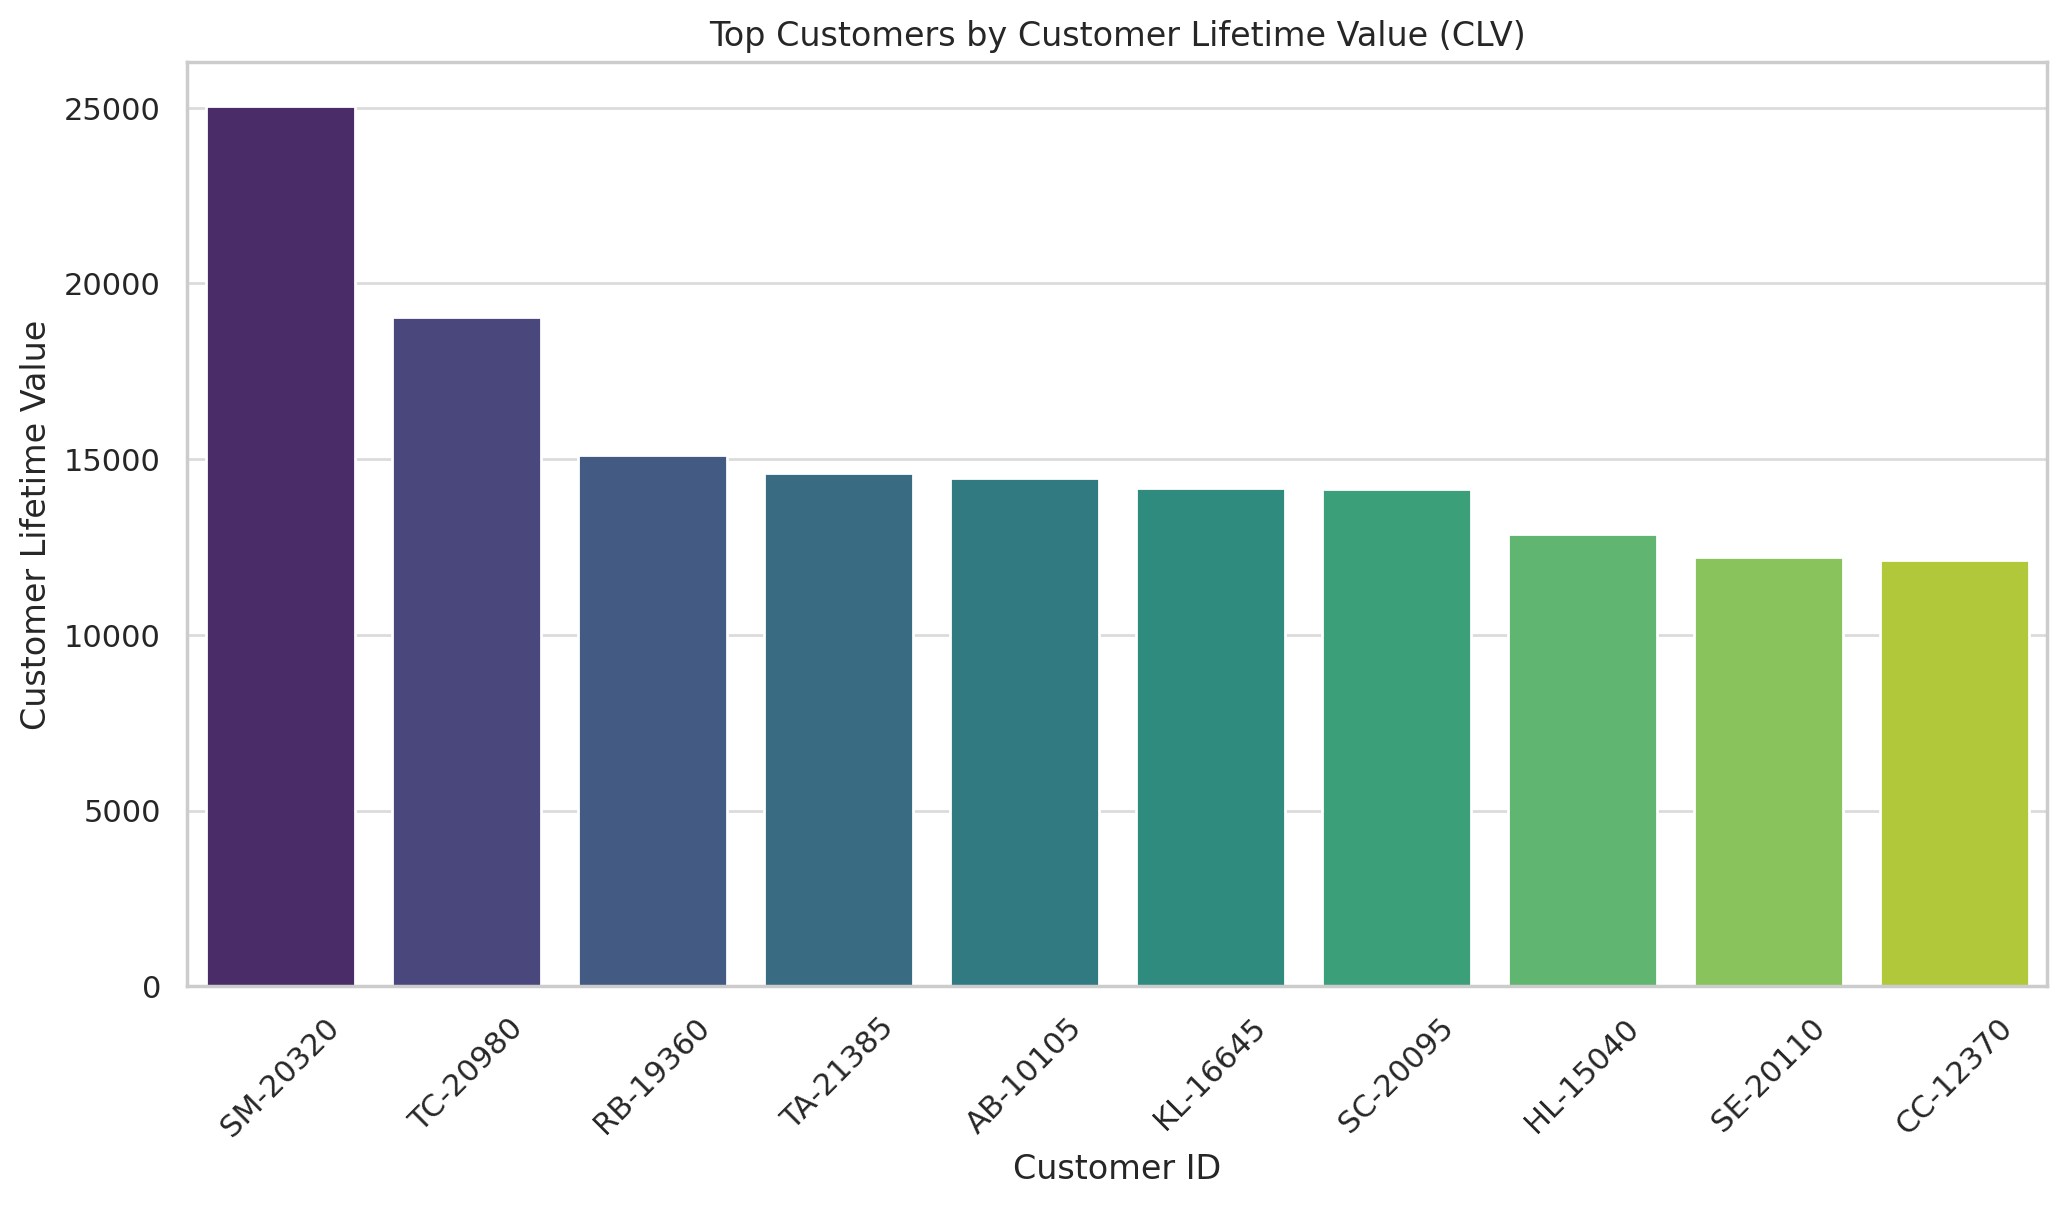

*Here's a bar plot visualizing the top customers by Customer Lifetime Value (CLV). Each bar represents a customer, with the height of the bar indicating their CLV. This chart helps identify which customers have contributed the most in terms of their lifetime value to the business. Customers like 'SM-20320' and 'TC-20980' show significantly high CLV, highlighting their importance to the business.*

We received different results, which is apparently due to different methods for calculating the CLV

I checked everyone in this call
for today, as usual do the xp exercises and the daily challenge for day 1
Python Instructor2:21 PM
dont do exercise 3
also for those that finishes day1, you can start doing xp exercise of day 2
Python Instructor2:22 PM
day 2 ex 1 dataset : https://www.kaggle.com/code/sarahm/customer-segmentation-using-rfm-analysis/input

day 2 ex 2 dataset : same dataset as below